### 라이브러리 로딩

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import statsmodels.api as sm
import math
from sklearn import preprocessing 

# 그래프 Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Decision tree

from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

#랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor

#그래디언트 부스팅
from sklearn.ensemble import GradientBoostingRegressor

#서포트 벡터 머신
from sklearn.svm import SVR

# 정규분포 및 회귀분석 등
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse

#스케일링
from sklearn.preprocessing import scale, minmax_scale, robust_scale
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
#선형 회귀모형
from sklearn.linear_model import LinearRegression
#변수선택법 (후진제거법)
from sklearn.feature_selection import RFE
#스케일 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기

In [3]:
df_raw = pd.read_csv("C:\\Users\\Sewon Lee\\Desktop\\big_data\\BOSTON_HOUSING.csv", engine = "python")
df_raw.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Sewon Lee\\Desktop\\big_data\\BOSTON_HOUSING.csv'

In [175]:
x_var = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]
y_var = ["MEDV"]

In [170]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 23 columns):
MEDV          506 non-null float64
CRIM          506 non-null float64
ZN            506 non-null float64
INDUS         506 non-null float64
CHAS          506 non-null int64
NOX           506 non-null float64
RM            506 non-null float64
AGE           506 non-null float64
DIS           506 non-null float64
RAD           506 non-null int64
TAX           506 non-null int64
PTRATIO       506 non-null float64
B             506 non-null float64
LSTAT         506 non-null float64
B_TR          506 non-null float64
CRIM_TR       506 non-null float64
B_GR          506 non-null category
ZN_GR         506 non-null category
PTRATIO_GR    506 non-null category
INDUS_GR      506 non-null category
RAD_GR        506 non-null category
TAX_GR        506 non-null category
AGE_GR        506 non-null category
dtypes: category(7), float64(13), int64(3)
memory usage: 67.5 KB


{'whiskers': [<matplotlib.lines.Line2D at 0x28a002bdda0>,
  ...],
 'caps': [<matplotlib.lines.Line2D at 0x28a0041e438>,
  ...],
 'boxes': [<matplotlib.lines.Line2D at 0x28a002bd9b0>,
 'medians': [<matplotlib.lines.Line2D at 0x28a0041eac8>,
 'fliers': [<matplotlib.lines.Line2D at 0x28a0041ee10>,
 'means': []}

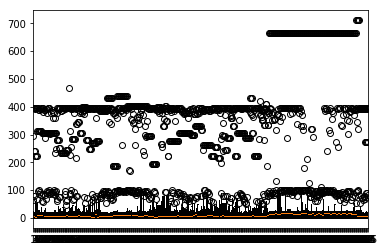

In [178]:
plt.boxplot(df_raw)

In [ ]:
box

In [97]:
df_raw.describe()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063
std,9.197104,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062
min,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000
50%,21.200001,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000
75%,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999
max,50.000000,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001


In [98]:
df_raw

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.980000
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.140000
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.030000
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.940000
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.330000
5,28.700001,0.02985,0.0,2.18,0,0.458,6.430,58.700001,6.0622,3,222,18.700001,394.119995,5.210000
6,22.900000,0.08829,12.5,7.87,0,0.524,6.012,66.599998,5.5605,5,311,15.200000,395.600006,12.430000
7,27.100000,0.14455,12.5,7.87,0,0.524,6.172,96.099998,5.9505,5,311,15.200000,396.899994,19.150000
8,16.500000,0.21124,12.5,7.87,0,0.524,5.631,100.000000,6.0821,5,311,15.200000,386.630005,29.930000
9,18.900000,0.17004,12.5,7.87,0,0.524,6.004,85.900002,6.5921,5,311,15.200000,386.709992,17.100000


# 변수 너무 쪼개지는 것들은 그루핑

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028A7765D518>,
      dtype=object)

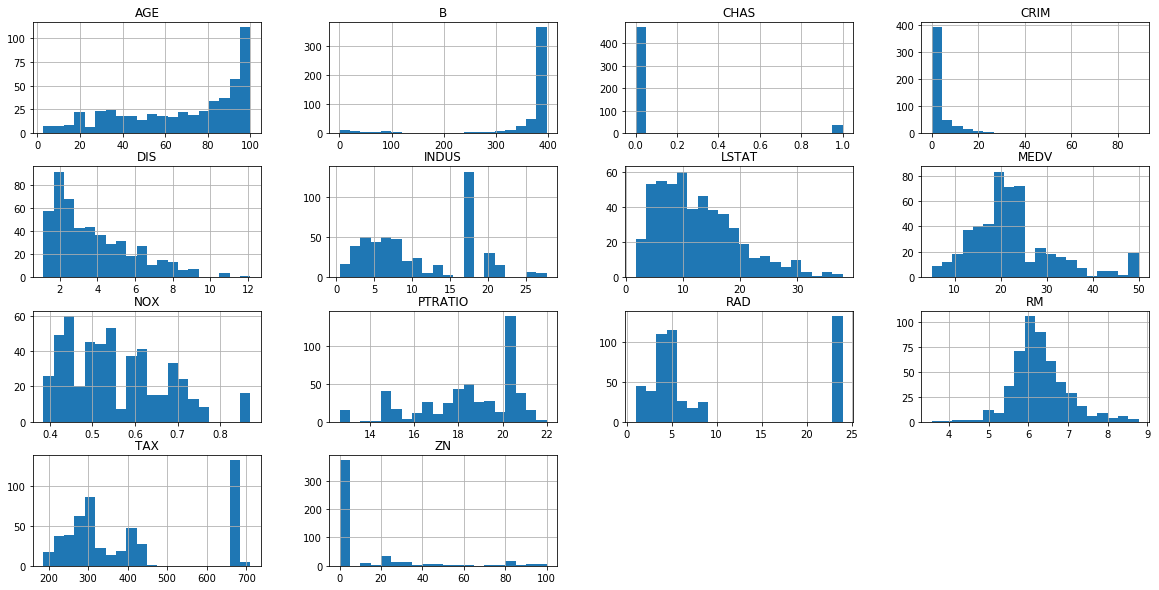

In [99]:
df_raw.hist(figsize=(20,10), bins=20)

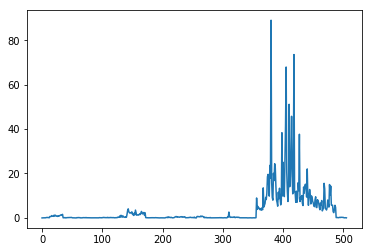

In [100]:
plt.plot(df_raw['CRIM'])

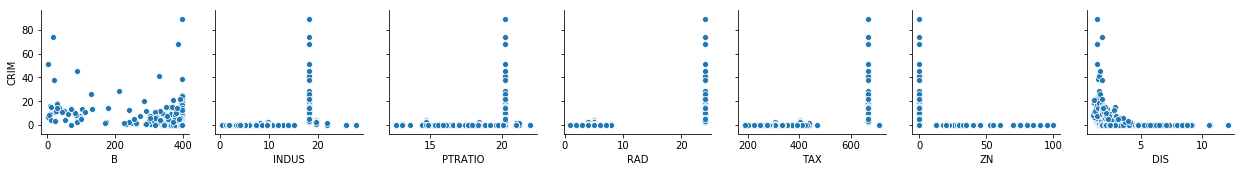

In [101]:
sns.pairplot(df_raw, y_vars='CRIM', x_vars=['B','INDUS','PTRATIO','RAD','TAX','ZN', 'DIS'])

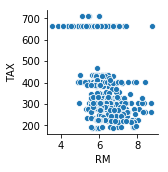

In [102]:
sns.pairplot(df_raw, y_vars='TAX', x_vars='RM')

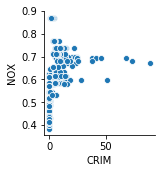

In [103]:
sns.pairplot(df_raw, y_vars='NOX', x_vars='CRIM')

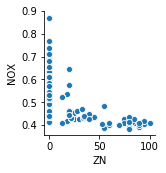

In [104]:
sns.pairplot(df_raw, y_vars='NOX', x_vars='ZN')

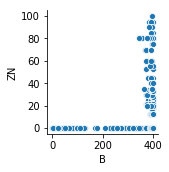

In [105]:
sns.pairplot(df_raw, y_vars='ZN', x_vars='B')

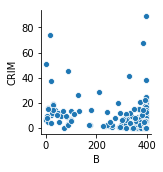

In [106]:
sns.pairplot(df_raw, y_vars='CRIM', x_vars='B')

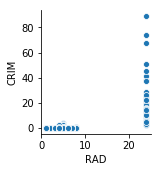

In [107]:
sns.pairplot(df_raw, y_vars='CRIM', x_vars='RAD')

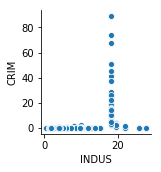

In [108]:
sns.pairplot(df_raw, y_vars='CRIM', x_vars='INDUS')

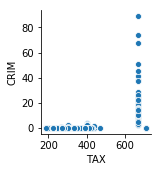

In [109]:
sns.pairplot(df_raw, y_vars='CRIM', x_vars='TAX')

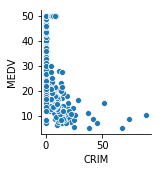

In [110]:
sns.pairplot(df_raw, y_vars='MEDV', x_vars='CRIM')

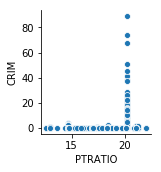

In [111]:
sns.pairplot(df_raw, y_vars='CRIM', x_vars='PTRATIO')

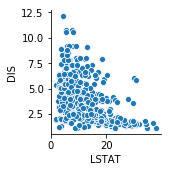

In [112]:
sns.pairplot(df_raw, y_vars='DIS', x_vars='LSTAT')

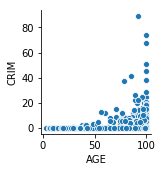

In [113]:
sns.pairplot(df_raw, y_vars='CRIM', x_vars='AGE')

In [179]:
df_raw['B2'] = df_raw['B2']**2

KeyError: 'B2'

# 공장단지 그루핑

In [205]:
df_raw['FACTORY'] = 0

In [222]:
df_raw.loc[(df_raw['INDUS_GR'] == '1' ) 
           & (df_raw['RAD_GR'] == '1' ) 
           & (df_raw['TAX_GR'] == '1' ) 
           & (df_raw['ZN_GR'] == '0' ), 'FACTORY'] = 1

In [224]:
df_raw['FACTORY'].value_counts()

0    374
1    132
Name: FACTORY, dtype: int64

In [228]:
df1 = df_raw['MEDV'][df_raw['FACTORY'] == 0]
df2 = df_raw['MEDV'][df_raw['FACTORY'] == 1]
 
#perform t-test assuming equal variances
tTestResult = stats.ttest_ind(df1, df2)
 
#perform t-test NOT assuming equal variances
tTestResultDiffVar = stats.ttest_ind(df1, df2, equal_var=False)
 
print("The t-statistic and p-value assuming equal variances is %.3f and %.3f." % tTestResult)
print("The t-statistic and p-value not assuming equal variances is %.3f and %.3f" % tTestResultDiffVar)

The t-statistic and p-value assuming equal variances is 9.690 and 0.000.
The t-statistic and p-value not assuming equal variances is 9.626 and 0.000


In [225]:
df_raw.groupby('FACTORY')['MEDV'].agg('mean')

FACTORY
0    24.695989
1    16.403788
Name: MEDV, dtype: float64

0    24.000000
1    21.600000
2    34.700001
3    33.400002
4    36.200001
Name: MEDV, dtype: float64

In [210]:
df_raw

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,...,B_TR,CRIM_TR,B_GR,ZN_GR,PTRATIO_GR,INDUS_GR,RAD_GR,TAX_GR,AGE_GR,FACTORY
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,...,0.441052,-0.419782,1,1,0,0,0,0,1,0
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,...,0.441052,-0.417339,1,0,0,0,0,0,1,0
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,...,0.396427,-0.417342,1,0,0,0,0,0,1,0
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,...,0.416163,-0.416750,1,0,0,0,0,0,0,0
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,...,0.441052,-0.412482,1,0,0,0,0,0,0,0
5,28.700001,0.02985,0.0,2.18,0,0.458,6.430,58.700001,6.0622,3,...,0.410571,-0.417044,1,0,0,0,0,0,1,0
6,22.900000,0.08829,12.5,7.87,0,0.524,6.012,66.599998,5.5605,5,...,0.426798,-0.410243,1,1,0,0,0,0,1,0
7,27.100000,0.14455,12.5,7.87,0,0.524,6.172,96.099998,5.9505,5,...,0.441052,-0.403696,1,1,0,0,0,0,2,0
8,16.500000,0.21124,12.5,7.87,0,0.524,5.631,100.000000,6.0821,5,...,0.328448,-0.395935,1,1,0,0,0,0,2,0
9,18.900000,0.17004,12.5,7.87,0,0.524,6.004,85.900002,6.5921,5,...,0.329325,-0.400729,1,1,0,0,0,0,1,0


# 스케일링 (B, CRIM)

In [181]:
df_BB = scale(df_raw['B'])
df_raw['B_TR'] = pd.DataFrame(df_BB)
df_raw['B_TR']

0      0.441052
1      0.441052
2      0.396427
3      0.416163
4      0.441052
5      0.410571
6      0.426798
7      0.441052
8      0.328448
9      0.329325
10     0.393028
11     0.441052
12     0.370880
13     0.441052
14     0.255973
15     0.427018
16     0.330860
17     0.329764
18    -0.742112
19     0.375814
20     0.218147
21     0.393138
22     0.441052
23     0.415176
24     0.412873
25    -0.583896
26     0.221546
27    -0.551442
28     0.342811
29     0.258276
         ...   
476    0.433486
477   -0.078878
478    0.252465
479    0.292156
480    0.441052
481    0.399059
482    0.423290
483    0.397414
484    0.154115
485    0.350267
486    0.394782
487    0.345881
488    0.421206
489   -0.138415
490   -0.419321
491    0.366604
492    0.441052
493    0.441052
494    0.441052
495    0.401471
496    0.441052
497    0.441052
498    0.441052
499    0.428662
500    0.441052
501    0.387217
502    0.441052
503    0.441052
504    0.403225
505    0.441052
Name: B_TR, Length: 506,

In [182]:
df_CR = scale(df_raw['CRIM'])
df_raw['CRIM_TR'] = pd.DataFrame(df_CR)
df_raw['CRIM_TR']

0     -0.419782
1     -0.417339
2     -0.417342
3     -0.416750
4     -0.412482
5     -0.417044
6     -0.410243
7     -0.403696
8     -0.395935
9     -0.400729
10    -0.394346
11    -0.406847
12    -0.409604
13    -0.347230
14    -0.346276
15    -0.347506
16    -0.297868
17    -0.329258
18    -0.327103
19    -0.336054
20    -0.274843
21    -0.321363
22    -0.277091
23    -0.305491
24    -0.333207
25    -0.322701
26    -0.342325
27    -0.309291
28    -0.330562
29    -0.303859
         ...   
476    0.146384
477    1.327804
478    0.770330
479    1.247542
480    0.257241
481    0.243762
482    0.246436
483   -0.092533
484   -0.143716
485    0.006999
486    0.241850
487    0.142225
488   -0.402961
489   -0.399178
490   -0.396375
491   -0.408212
492   -0.407563
493   -0.400349
494   -0.387983
495   -0.399688
496   -0.386816
497   -0.389285
498   -0.392690
499   -0.399823
500   -0.394406
501   -0.413229
502   -0.415249
503   -0.413447
504   -0.407764
505   -0.415000
Name: CRIM_TR, Length: 5

(array([439.,  44.,  14.,   1.,   3.,   2.,   0.,   1.,   1.,   1.]),
 array([-0.41978194,  0.61558927,  1.65096049,  2.6863317 ,  3.72170291,
         4.75707413,  5.79244534,  6.82781655,  7.86318776,  8.89855898,
         9.93393019]),
 <a list of 10 Patch objects>)

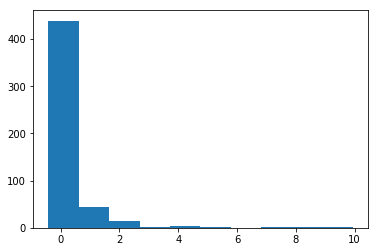

In [183]:
plt.hist(df_raw['CRIM_TR'])

# B 그루핑

In [184]:
bins = [-1, 300, 100000]
labels = ["0", "1"]
df_raw['B_GR'] = pd.cut(df_raw['B'], bins, labels=labels)
df_raw['B_GR']

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     0
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
476    1
477    1
478    1
479    1
480    1
481    1
482    1
483    1
484    1
485    1
486    1
487    1
488    1
489    1
490    1
491    1
492    1
493    1
494    1
495    1
496    1
497    1
498    1
499    1
500    1
501    1
502    1
503    1
504    1
505    1
Name: B_GR, Length: 506, dtype: category
Categories (2, object): [0 < 1]

In [208]:
count = df_raw['FACTORY'].value_counts().sort_index()
cumcnt = np.cumsum(count)
percent = count/sum(count) * 100
cumpct = np.cumsum(percent)
count_data = pd.DataFrame({'COUNT':count, 'CumCnt':cumcnt, 'Percent':percent, 'CumPct':cumpct})
count_data.columns.name='Data'
count_data

Data,COUNT,CumCnt,Percent,CumPct
0,506,506,100.0,100.0


# 주거지 비율 처리 (0 : 상업지구, 1 : 주거지구)

In [186]:
bins = [-1, 12.0, 1000.0]
labels = ["0", "1"]
df_raw['ZN_GR'] = pd.cut(df_raw['ZN'], bins, labels=labels)
df_raw['ZN_GR']

0      1
1      0
2      0
3      0
4      0
5      0
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
476    0
477    0
478    0
479    0
480    0
481    0
482    0
483    0
484    0
485    0
486    0
487    0
488    0
489    0
490    0
491    0
492    0
493    0
494    0
495    0
496    0
497    0
498    0
499    0
500    0
501    0
502    0
503    0
504    0
505    0
Name: ZN_GR, Length: 506, dtype: category
Categories (2, object): [0 < 1]

# PTRATIO 비율 처리 (0 : 거주지, 1 : 공장지대)

In [187]:
bins = [-1, 19, 100000]
labels = ["0", "1"]
df_raw['PTRATIO_GR'] = pd.cut(df_raw['PTRATIO'], bins, labels=labels)
df_raw['PTRATIO_GR']

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
476    1
477    1
478    1
479    1
480    1
481    1
482    1
483    1
484    1
485    1
486    1
487    1
488    1
489    1
490    1
491    1
492    1
493    1
494    1
495    1
496    1
497    1
498    1
499    1
500    1
501    1
502    1
503    1
504    1
505    1
Name: PTRATIO_GR, Length: 506, dtype: category
Categories (2, object): [0 < 1]

# INDUS 그루핑 (0: 소매업, 1: 비소매업)

In [188]:
bins = [-1, 16, 100000]
labels = ["0", "1"]
df_raw['INDUS_GR'] = pd.cut(df_raw['INDUS'], bins, labels=labels)
df_raw['INDUS_GR']

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
476    1
477    1
478    1
479    1
480    1
481    1
482    1
483    1
484    1
485    1
486    1
487    1
488    1
489    1
490    1
491    1
492    1
493    0
494    0
495    0
496    0
497    0
498    0
499    0
500    0
501    0
502    0
503    0
504    0
505    0
Name: INDUS_GR, Length: 506, dtype: category
Categories (2, object): [0 < 1]

# RAD 그루핑 (0: 불편지역, 1: 편의지역)

In [189]:
bins = [-1, 15, 1000]
labels = ["0", "1"]
df_raw['RAD_GR'] = pd.cut(df_raw['RAD'], bins, labels=labels)
df_raw['RAD_GR']

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
476    1
477    1
478    1
479    1
480    1
481    1
482    1
483    1
484    1
485    1
486    1
487    1
488    0
489    0
490    0
491    0
492    0
493    0
494    0
495    0
496    0
497    0
498    0
499    0
500    0
501    0
502    0
503    0
504    0
505    0
Name: RAD_GR, Length: 506, dtype: category
Categories (2, object): [0 < 1]

# TAX 그루핑 (0: 재산세 적게 내는 지역, 1: 재산세 높은 지역)

In [190]:
bins = [-1, 500, 1000]
labels = ["0", "1"]
df_raw['TAX_GR'] = pd.cut(df_raw['TAX'], bins, labels=labels)
df_raw['TAX_GR']

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
476    1
477    1
478    1
479    1
480    1
481    1
482    1
483    1
484    1
485    1
486    1
487    1
488    1
489    1
490    1
491    1
492    1
493    0
494    0
495    0
496    0
497    0
498    0
499    0
500    0
501    0
502    0
503    0
504    0
505    0
Name: TAX_GR, Length: 506, dtype: category
Categories (2, object): [0 < 1]

In [191]:
count = df_raw['PTRATIO_GR'].value_counts().sort_index()
cumcnt = np.cumsum(count)
percent = count/sum(count) * 100
cumpct = np.cumsum(percent)
count_data = pd.DataFrame({'COUNT':count, 'CumCnt':cumcnt, 'Percent':percent, 'CumPct':cumpct})
count_data.columns.name='Data'
count_data

Data,COUNT,CumCnt,Percent,CumPct
0,253,253,50.0,50.0
1,253,506,50.0,100.0


# AGE 변수 그루핑 방법 (0:신생, 1:중간, 2:구식)

In [192]:
df_raw['AGE_GR'] = pd.qcut(df_raw['AGE'], 3, labels=["0", "1", "2"])
df_raw['AGE_GR']

0      1
1      1
2      1
3      0
4      0
5      1
6      1
7      2
8      2
9      1
10     2
11     1
12     0
13     1
14     1
15     1
16     0
17     1
18     0
19     1
20     2
21     1
22     2
23     2
24     2
25     1
26     2
27     1
28     2
29     1
      ..
476    2
477    2
478    2
479    1
480    1
481    1
482    1
483    0
484    0
485    0
486    1
487    0
488    2
489    2
490    2
491    2
492    1
493    0
494    0
495    0
496    1
497    1
498    1
499    1
500    1
501    1
502    1
503    2
504    1
505    1
Name: AGE_GR, Length: 506, dtype: category
Categories (3, object): [0 < 1 < 2]

In [193]:
df_raw.isnull().sum()

MEDV          0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
B             0
LSTAT         0
B_TR          0
CRIM_TR       0
B_GR          0
ZN_GR         0
PTRATIO_GR    0
INDUS_GR      0
RAD_GR        0
TAX_GR        0
AGE_GR        0
dtype: int64

In [194]:
f_result = stats.f_oneway(df_raw['AGE_GR'][df_raw['AGE_GR'] == '1']
                          ,df_raw['AGE_GR'][df_raw['AGE_GR'] == '2']
                          ,df_raw['AGE_GR'][df_raw['AGE_GR'] == '3'])

f,p=f_result.statistic.round(3), f_result.pvalue.round(3)

print("One-way ANOVA")
print("F검정통계량:{}".format(f))
print("p-value:{}".format(p))

One-way ANOVA
F검정통계량:nan
p-value:nan


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028A04AA1F60>,
      dtype=object)

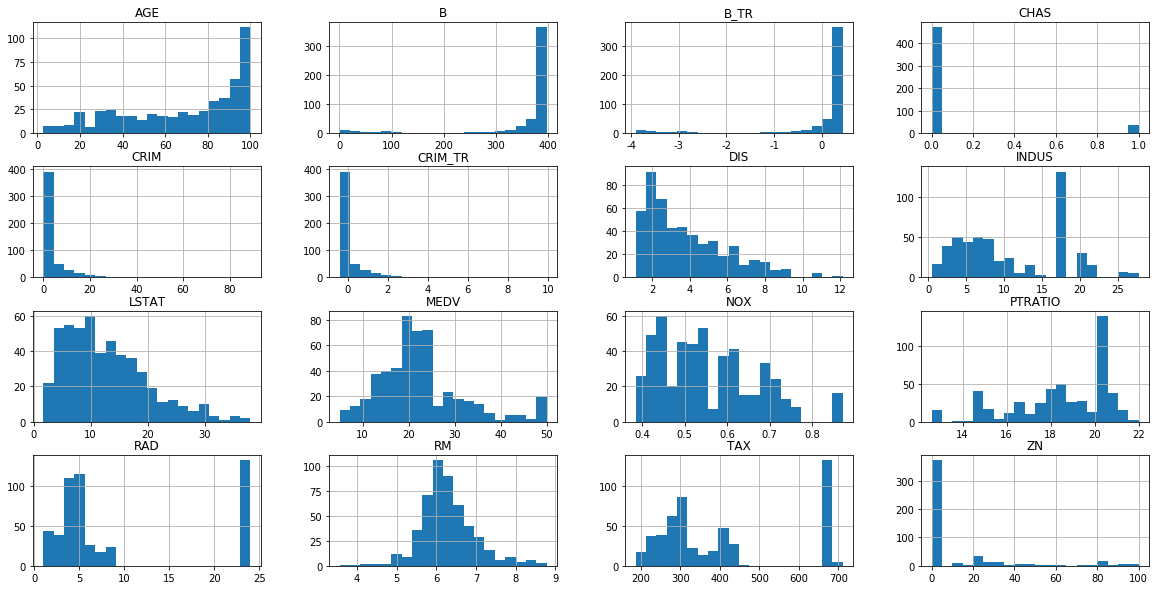

In [195]:
df_raw.hist(figsize=(20,10), bins=20)

# 전처리 완료 및 데이터 가공 시작

In [131]:
df_raw_y = df_raw['MEDV']
df_raw_x = df_raw[["CRIM","ZN_GR","INDUS_GR","CHAS","NOX","RM","DIS","AGE","RAD_GR","TAX_GR","PTRATIO_GR","LSTAT"]]

In [132]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y,
                                                                test_size = 0.3, random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (354, 12)
train data Y size : (354,)
test data X size : (152, 12)
test data Y size : (152,)


# 다중 회귀분석 실시

In [133]:
reg_model = smf.ols(formula = "MEDV ~ CRIM+ZN_GR+CHAS+NOX+RM+DIS+PTRATIO_GR+LSTAT", data=df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     148.1
Date:                Fri, 19 Jul 2019   Prob (F-statistic):          2.63e-126
Time:                        09:33:15   Log-Likelihood:                -1531.9
No. Observations:                 506   AIC:                             3082.
Df Residuals:                     497   BIC:                             3120.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          15.6980      3.833     

## 다중공선성 확인

# Decision Tree 분석 실시

In [134]:
tree_final = DecisionTreeRegressor()
tree_final.fit(df_train_x, df_train_y)

print(tree_final.score(df_train_x,df_train_y))
print(tree_final.score(df_test_x,df_test_y))

1.0
0.8448222720898002


# RANDOM FOREST 분석 실시

In [135]:
rf_final = RandomForestRegressor()
rf_final.fit(df_train_x, df_train_y)

print(rf_final.score(df_train_x,df_train_y))
print(rf_final.score(df_test_x,df_test_y))

0.9710474175038961
0.869417555461242


# GRADIENT BOOSITNG 분석 실시

In [169]:
gb_final = GradientBoostingRegressor(random_state = 1, n_estimators = 40, min_samples_leaf = 4,
                                     min_samples_split=22,max_depth=3,learning_rate=0.2)
gb_final.fit(df_train_x, df_train_y)

print(gb_final.score(df_train_x,df_train_y))
print(gb_final.score(df_test_x,df_test_y))

0.9622142998708767
0.8972327330143507


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028A79F14710>]],
      dtype=object)

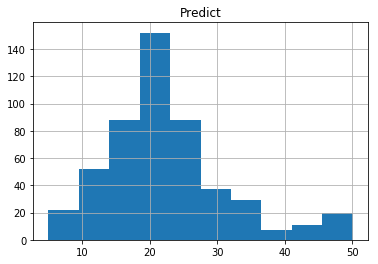

In [87]:
y_predict=gb_final.predict(df_raw_x)
y_pre = pd.DataFrame()
y_pre['Predict'] = y_predict

y_pre.hist()

# SUPPORT VECTOR MACHINE 분석 실시

In [91]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance['Importance'] = gb_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
5,RM,0.459
11,LSTAT,0.343
6,DIS,0.106
0,CRIM,0.034
4,NOX,0.025
7,AGE,0.016
10,PTRATIO_GR,0.012
9,TAX_GR,0.003
3,CHAS,0.001
2,INDUS_GR,0.001


Text(0, 0.5, '변수')

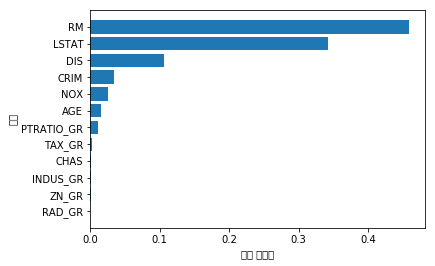

In [92]:
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수 중요도")
plt.ylabel("변수")